In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    make_scorer,
    recall_score,
)
from joblib import dump
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [2]:
output_path = os.path.join('..', 'data', 'processed')

In [3]:
df = pd.read_csv(os.path.join(output_path, 'Processed_df.csv'))

train_data = pd.read_csv(os.path.join(output_path, 'train_data16variables.csv'))
test_data = pd.read_csv(os.path.join(output_path, 'test_data16variables.csv'))

X_train = train_data.drop(columns=['grav'])  
y_train = train_data['grav']
X_test = test_data.drop(columns=['grav'])
y_test = test_data['grav']

KNN

In [32]:
# Définir les métriques d'évaluation avec le scoring personnalisé label 2 = Tué
scorer = make_scorer(recall_score, average='macro', labels=[2])

# Définir la grille de recherche
param_grid = {'n_neighbors': [50, 181, 250]}

# Définir le modèle KNN
knn = neighbors.KNeighborsClassifier()

# Initialiser GridSearchCV avec les hyperparamètres
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=4)

# Exécuter la recherche sur la grille sur les données d'entraînement
grid_search_knn.fit(X_train, y_train)

# Obtenir les meilleurs paramètres
best_params_knn = grid_search_knn.best_params_
print("Meilleurs paramètres:", best_params_knn)

# Prédire sur les données de test avec le meilleur modèle
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test.values)

# Afficher le rapport de classification sur les données de test
class_report = classification_report(y_test, y_pred_knn)
print("Rapport de classification sur les données de test :\n", class_report)

Meilleurs paramètres: {'n_neighbors': 250}


d:\Nico\Code\jun24_cmlops_accidents\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Rapport de classification sur les données de test :
               precision    recall  f1-score   support

           1       0.59      0.72      0.65     11554
           2       0.51      0.72      0.59     11554
           3       0.42      0.24      0.30     11554
           4       0.49      0.38      0.43     11554

    accuracy                           0.51     46216
   macro avg       0.50      0.51      0.49     46216
weighted avg       0.50      0.51      0.49     46216



In [34]:
model_path = '../models'
dump(grid_search_knn.best_estimator_, os.path.join(model_path, 'KNN_250.joblib'))

['../models\\KNN_250.joblib']

In [41]:
accuracy = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')
precision = precision_score(y_test, y_pred_knn, average='macro')

KNN250_performance_data = {
    "accuracy": accuracy,
    "f1_score": f1,
    "recall": recall,
    "precision": precision
}
KNN250_performance_data = {key: float(value) for key, value in KNN250_performance_data.items()}
print(KNN250_performance_data)

{'accuracy': 0.5146269690150597, 'f1_score': 0.49333974682631226, 'recall': 0.5146269690150597, 'precision': 0.4996245809185517}


In [43]:
with open('../models/KNN250_performance.json', 'w') as f:
    json.dump(KNN250_performance_data, f)

In [15]:
print(X_train.dtypes.unique())
print(X_test.dtypes.unique())

[dtype('bool')]
[dtype('bool')]


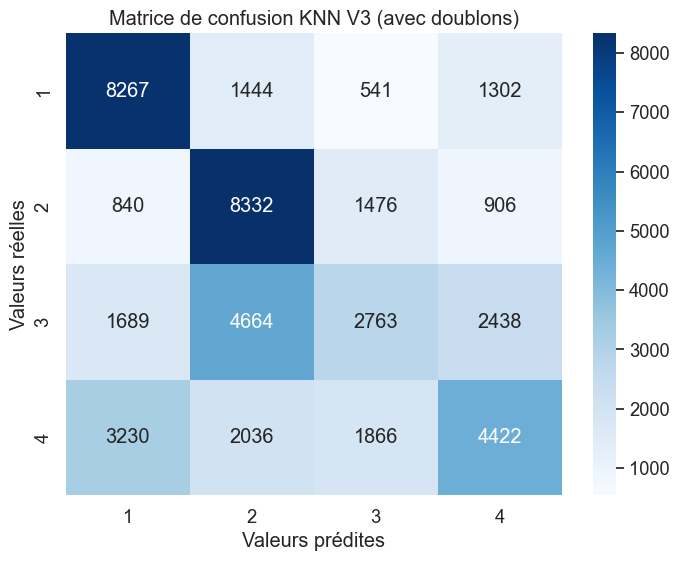

In [35]:
# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Étiquettes personnalisées
labels = [1, 2, 3, 4]

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion KNN V3 (avec doublons)')
plt.show()

Regression logistique

In [24]:
# Définir les métriques d'évaluation avec le scoring personnalisé
scorer = make_scorer(recall_score, average='macro', labels=[2])

# Définition des hyperparamètres à rechercher
param_grid = {
    'penalty': ['l2'],  # Type de régularisation
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Force de régularisation
}

# Création du modèle de régression logistique
lr = LogisticRegression(max_iter=1000)

# Création de l'objet GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=4)

# Exécuter la recherche sur la grille sur les données d'entraînement
grid_search_lr.fit(X_train, y_train)

# Obtenir les meilleurs paramètres
best_params_lr = grid_search_lr.best_params_
print("Meilleurs paramètres:", best_params_lr)

# Prédire sur les données de test avec le meilleur modèle
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)

# Afficher le rapport de classification sur les données de test
class_report = classification_report(y_test, y_pred_lr)
print("Rapport de classification sur les données de test :\n", class_report)

Meilleurs paramètres: {'C': 0.001, 'penalty': 'l2'}
Rapport de classification sur les données de test :
               precision    recall  f1-score   support

           1       0.55      0.72      0.63     11554
           2       0.52      0.63      0.57     11554
           3       0.40      0.24      0.30     11554
           4       0.46      0.40      0.43     11554

    accuracy                           0.50     46216
   macro avg       0.48      0.50      0.48     46216
weighted avg       0.48      0.50      0.48     46216



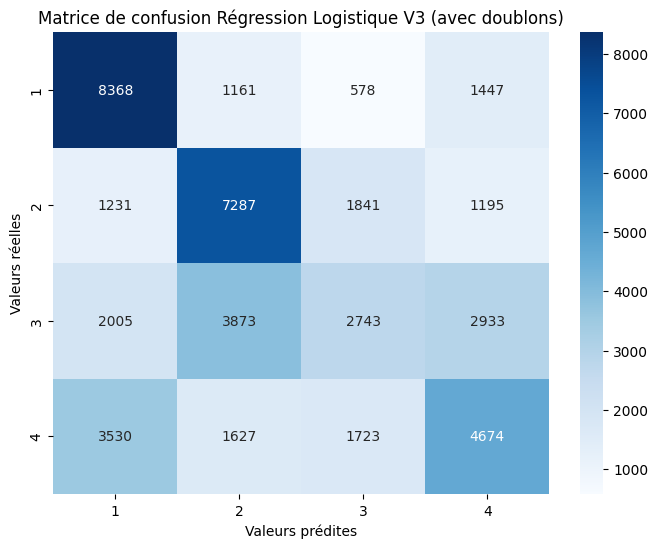

In [25]:
# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Étiquettes personnalisées
labels = [1, 2, 3, 4]

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion Régression Logistique V3 (avec doublons)')
plt.show()

Decision tree

In [28]:
# Définir les métriques d'évaluation avec le scoring personnalisé
scorer = make_scorer(recall_score, average='macro', labels=[2])

# Définir les hyperparamètres à tester
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser le modèle d'arbre de décision
dt = DecisionTreeClassifier()

# Création de l'objet GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=4)

# Exécuter la recherche sur la grille sur les données d'entraînement
grid_search_dt.fit(X_train, y_train)

# Obtenir les meilleurs paramètres
best_params_dt = grid_search_dt.best_params_
print("Meilleurs paramètres:", best_params_dt)

# Prédire sur les données de test avec le meilleur modèle
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)

# Afficher le rapport de classification sur les données de test
class_report = classification_report(y_test, y_pred_dt)
print("Rapport de classification sur les données de test :\n", class_report)

Meilleurs paramètres: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Rapport de classification sur les données de test :
               precision    recall  f1-score   support

           1       0.58      0.66      0.62     11554
           2       0.50      0.62      0.56     11554
           3       0.37      0.23      0.28     11554
           4       0.44      0.44      0.44     11554

    accuracy                           0.49     46216
   macro avg       0.47      0.49      0.47     46216
weighted avg       0.47      0.49      0.47     46216



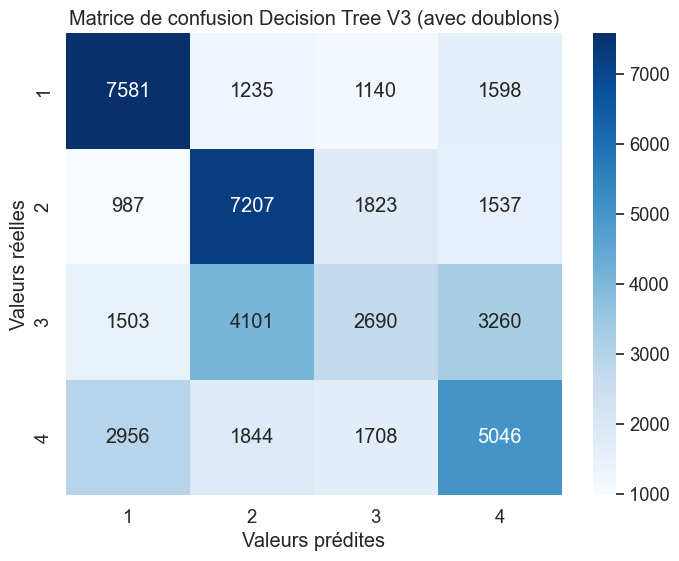

In [29]:
# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Créer un heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuster la taille de la police
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['1','2','3','4'], 
            yticklabels=['1','2','3','4'])
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion Decision Tree V3 (avec doublons)')
plt.show()

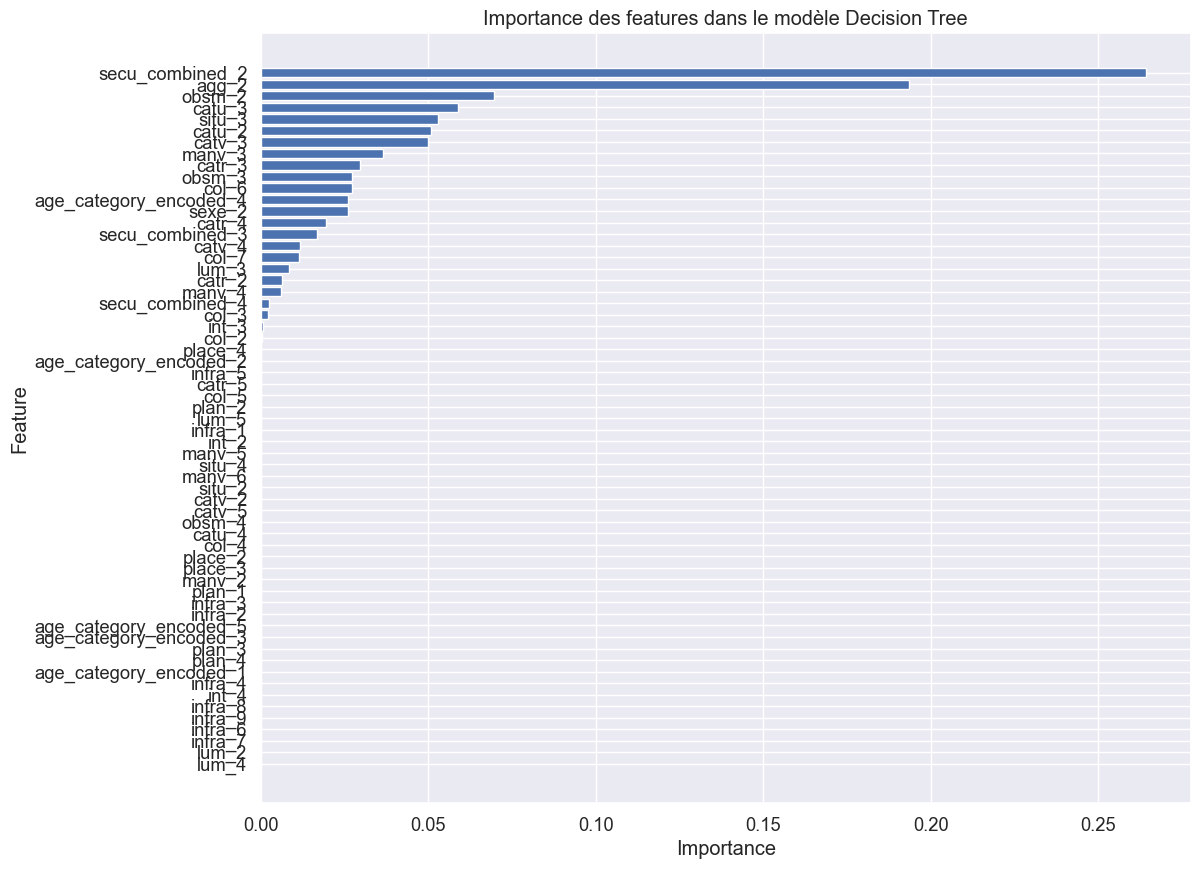

In [30]:
# Obtenir l'importance des features à partir du meilleur modèle
importance = grid_search_dt.best_estimator_.feature_importances_

# Obtenez le nom des features
feature_names = X_train.columns  

# Créer un DataFrame pour une meilleure manipulation
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Trier les features par importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Tracer les features importantes
plt.figure(figsize=(12, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importance des features dans le modèle Decision Tree')
plt.gca().invert_yaxis()
plt.show()

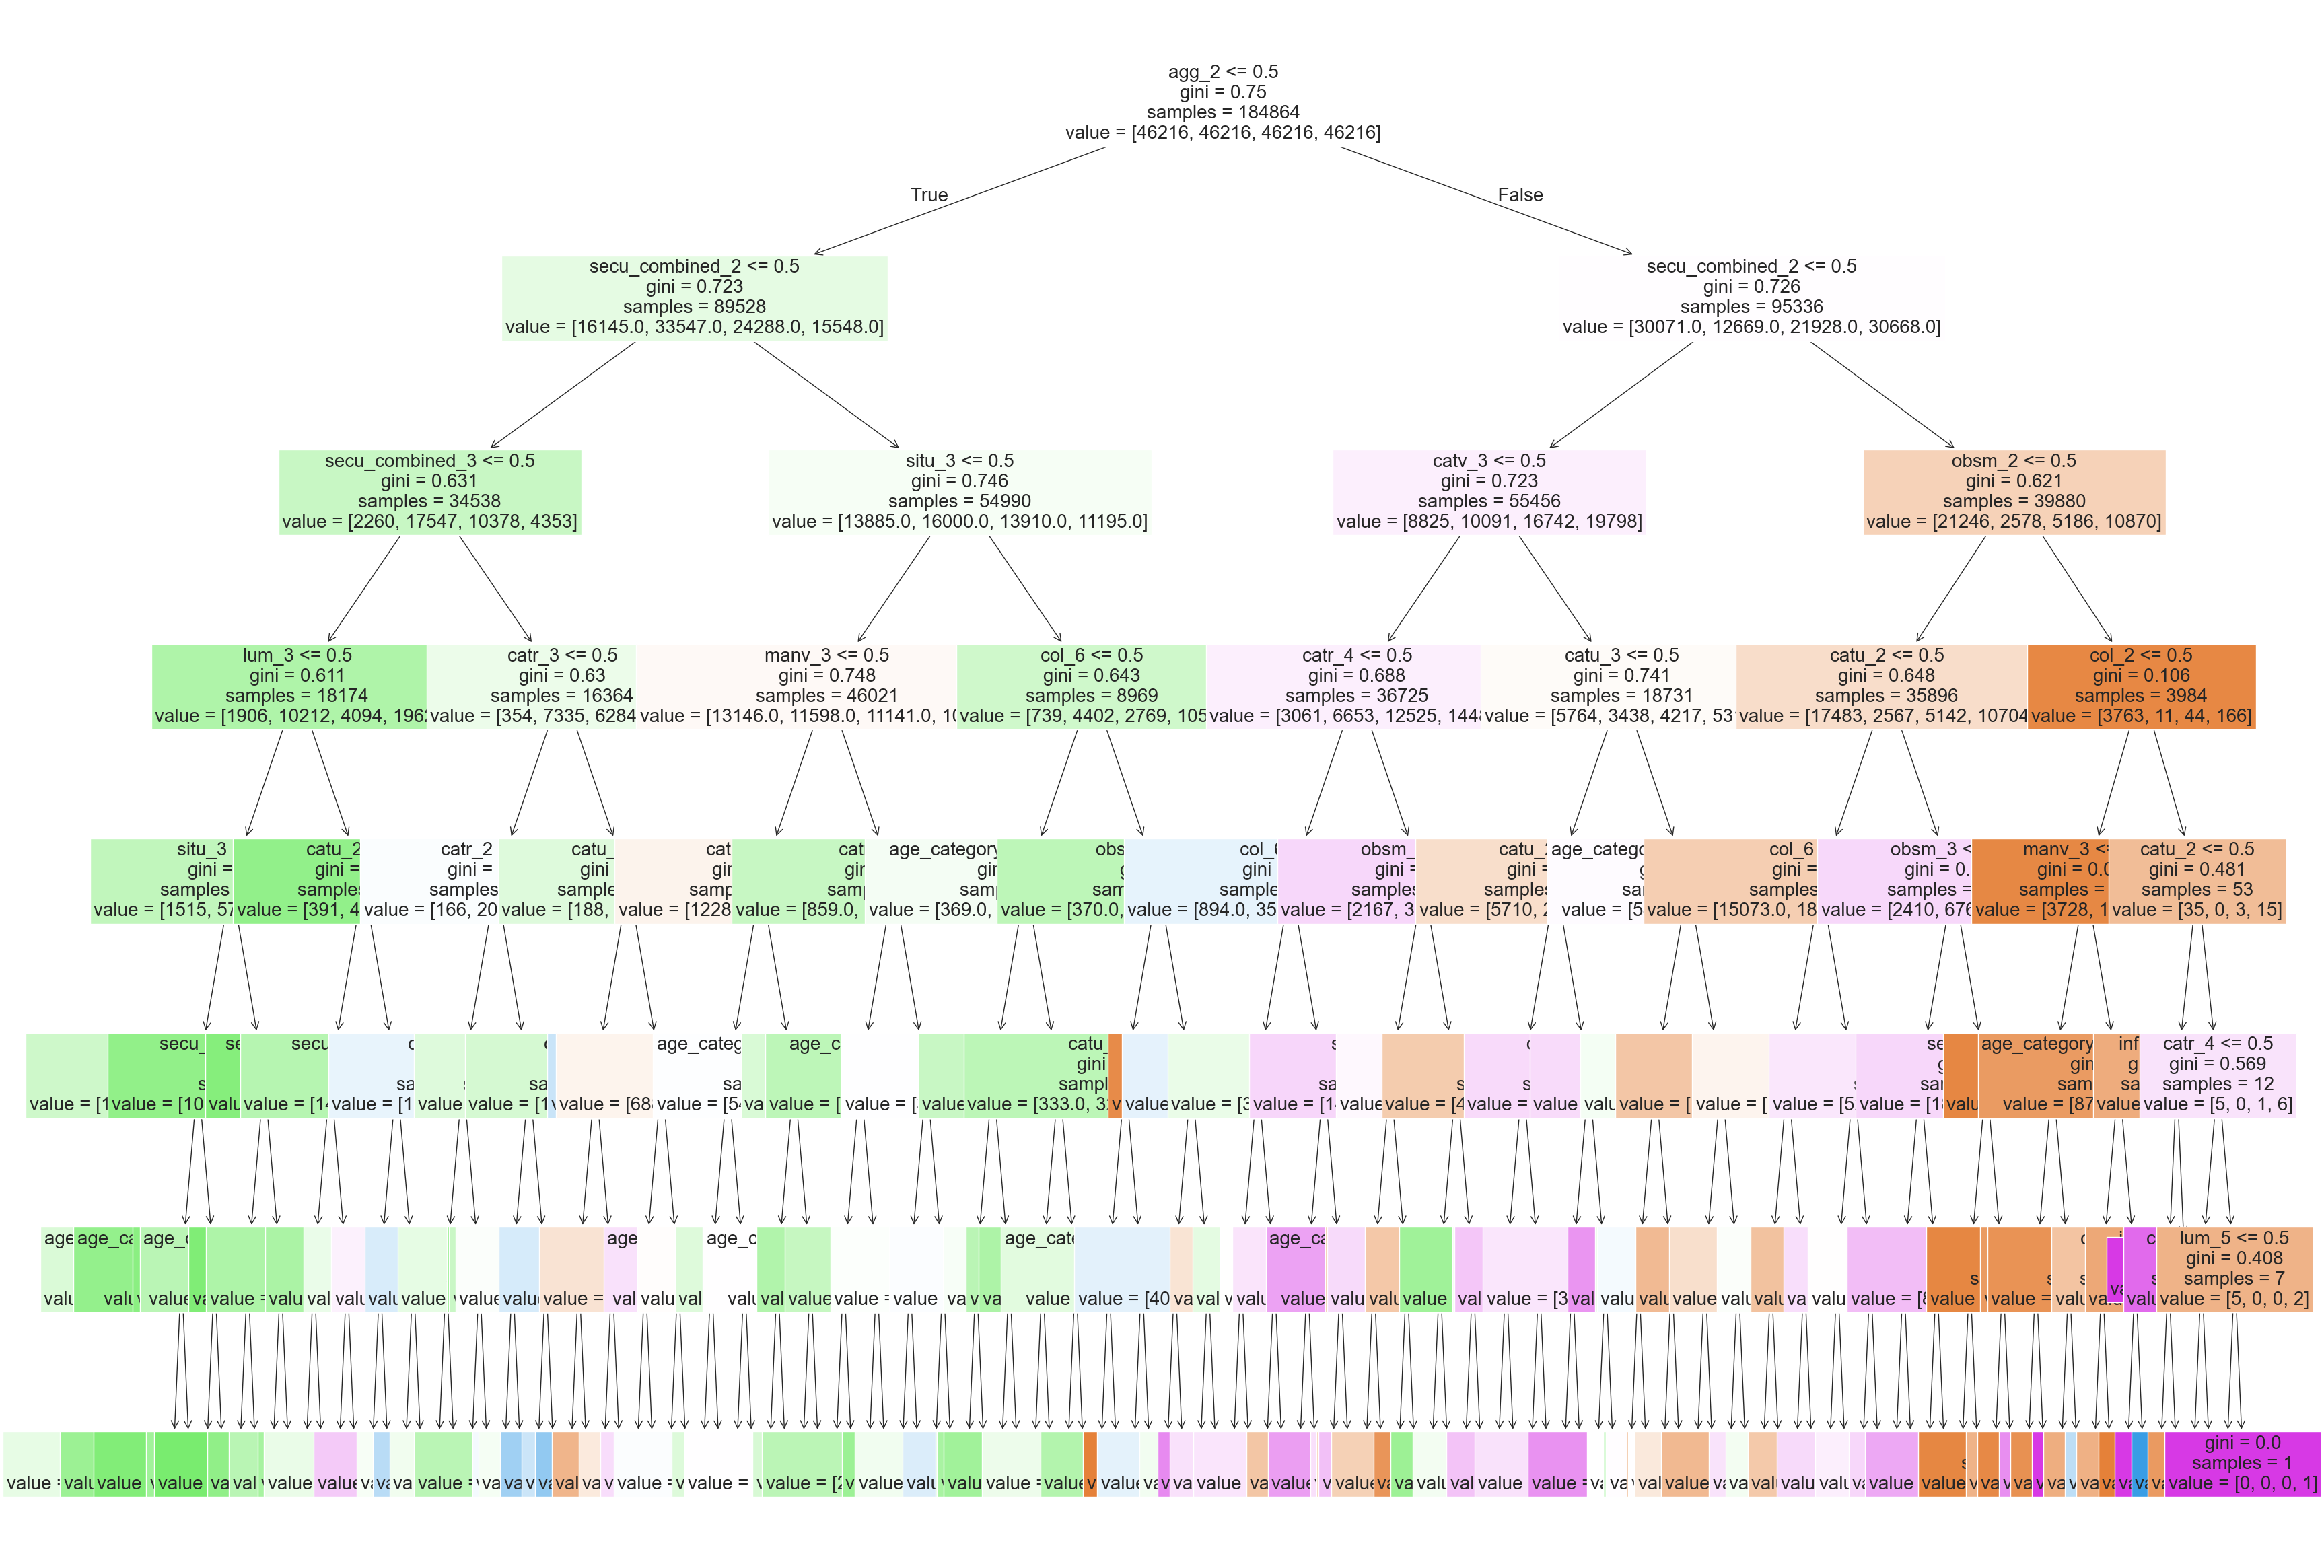

In [31]:
# Tracer l'arbre de décision
plt.figure(figsize=(40,30))
plot_tree(grid_search_dt.best_estimator_, feature_names=X_train.columns.tolist(), filled=True, fontsize=20)
plt.show()